|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('instagram_users.csv')

# Q3: Split tha dataset into training and testing

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop('real_fake',axis=1)
y = df['real_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
predictions = dtr.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        fake       0.85      0.85      0.85      9496
        real       0.86      0.85      0.86      9778

    accuracy                           0.85     19274
   macro avg       0.85      0.85      0.85     19274
weighted avg       0.85      0.85      0.85     19274



In [6]:
print('%',accuracy_score(y_test,predictions)*100)

% 85.37926740686935


In [7]:
print(confusion_matrix(y_test,predictions))

[[8099 1397]
 [1421 8357]]


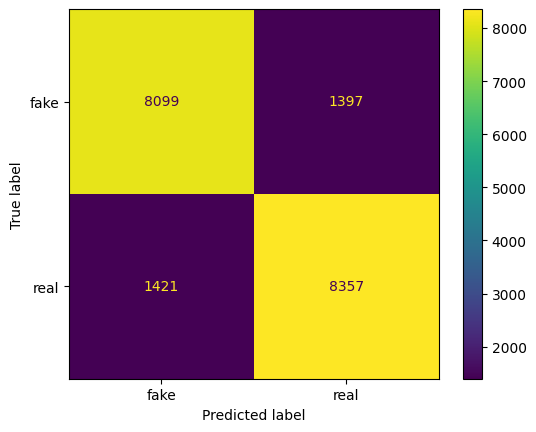

In [8]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtr, X_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
predictions_rfc = rfc.predict(X_test)
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

        fake       0.95      0.84      0.89      9496
        real       0.86      0.95      0.90      9778

    accuracy                           0.90     19274
   macro avg       0.90      0.90      0.90     19274
weighted avg       0.90      0.90      0.90     19274



In [13]:
print('%',accuracy_score(y_test,predictions_rfc)*100)

% 89.64926844453667


In [14]:
print(confusion_matrix(y_test,predictions_rfc))

[[7948 1548]
 [ 447 9331]]


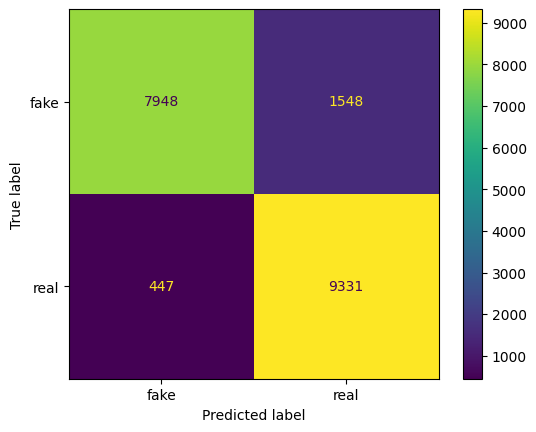

In [15]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
predictions_knn = knn.predict(X_test)
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

        fake       0.75      0.72      0.74      9496
        real       0.74      0.77      0.75      9778

    accuracy                           0.74     19274
   macro avg       0.75      0.74      0.74     19274
weighted avg       0.75      0.74      0.74     19274



In [48]:
print('%',accuracy_score(y_test,predictions_knn)*100)

% 74.48376050638166


In [49]:
print(confusion_matrix(y_test,predictions_knn))

[[6861 2635]
 [2283 7495]]


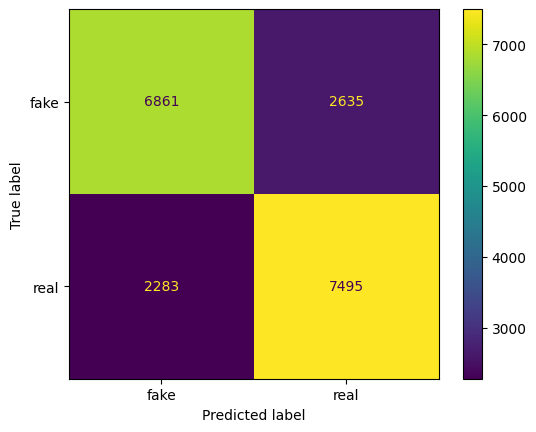

In [50]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()